# 로또 데이터 분석
## 로또 번호 예측하기

- 문제 정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석
- 예측
- 결론 및 시사점

## 1. 문제 정의
매주 토요일 추첨되는 로또는 1~45까지의 숫자 중 총 6개의 자릿수를 맞히는 온라인 복권이다.  
1등에 당첨될 확률은 814만 5060분의 1(0.0000123%)에 불과하다.  

역대 추첨된 로또 번호를 파이썬 크롤링을 통하여 수집하고  
어떤 번호가 가장 많이 나왔는지 추첨된 번호의 분포는 어떠한지를 알아보고  
추첨될 로또 번호를 예측해보자.

In [1]:
from IPython.display import Image
Image(url="https://mblogthumb-phinf.pstatic.net/20130624_105/if_co_1372001742522bnSdQ_JPEG/%B3%AA%B4%AE%B7%CE%B6%C7.jpg?type=w2")

## 2. 데이터 수집
크롤링을 통해 1회차(2002년 12월 7일) ~ 1054회차(2023년 2월 11일)  
로또 당첨번호 및 당첨금액 수집

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font)
import seaborn as sns
import numpy as np
import re

In [3]:
data = pd.read_csv('lotto_num.csv')
data

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1회,2002년12월07일,10,23,29,33,37,40,16,0,0원,"3,681,782,000원"
1,2회,2002년12월14일,9,13,21,25,32,42,2,1,"2,002,006,800원","4,904,274,000원"
2,3회,2002년12월21일,11,16,19,21,27,31,30,1,"2,000,000,000원","4,729,342,000원"
3,4회,2002년12월28일,14,27,30,31,40,42,2,0,0원,"5,271,464,000원"
4,5회,2003년01월04일,16,24,29,40,41,42,3,0,0원,"6,277,102,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050회,2023년01월14일,6,12,31,35,38,43,17,17,"1,535,083,280원","108,072,602,000원"
1050,1051회,2023년01월21일,21,26,30,32,33,35,44,18,"1,669,558,480원","119,243,907,000원"
1051,1052회,2023년01월28일,5,17,26,27,35,38,1,11,"2,341,682,762원","107,565,461,000원"
1052,1053회,2023년02월04일,22,26,29,30,34,45,15,7,"4,090,367,411원","113,721,665,000원"


## 3. 데이터 전처리

In [4]:
data.head()

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1회,2002년12월07일,10,23,29,33,37,40,16,0,0원,"3,681,782,000원"
1,2회,2002년12월14일,9,13,21,25,32,42,2,1,"2,002,006,800원","4,904,274,000원"
2,3회,2002년12월21일,11,16,19,21,27,31,30,1,"2,000,000,000원","4,729,342,000원"
3,4회,2002년12월28일,14,27,30,31,40,42,2,0,0원,"5,271,464,000원"
4,5회,2003년01월04일,16,24,29,40,41,42,3,0,0원,"6,277,102,000원"


### Data Dictinary
- 회차 : 1 ~ 1054회
- 일자 : 추첨일 기준 (2002년 12월 07일 ~ )
- 번호1 ~ 6 : 각 회차별 추첨된 번호 6자리
- 보너스 : 2등 보너스 추첨 번호
- 1등 당첨자수
- 1등 당첨금액
- 총 판매금액

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   회차       1054 non-null   object
 1   일자       1054 non-null   object
 2   번호1      1054 non-null   int64 
 3   번호2      1054 non-null   int64 
 4   번호3      1054 non-null   int64 
 5   번호4      1054 non-null   int64 
 6   번호5      1054 non-null   int64 
 7   번호6      1054 non-null   int64 
 8   보너스      1054 non-null   int64 
 9   1등 당첨자수  1054 non-null   int64 
 10  1등 당첨금액  1054 non-null   object
 11  총 판매금액   1054 non-null   object
dtypes: int64(8), object(4)
memory usage: 98.9+ KB


- 일자 컬럼을 datetime 형식으로 변환
- 1등 당첨금액, 총 판매금액 컬럼을 수치형으로 변환

In [6]:
data['일자'] = data['일자'].str.replace(pat=r'[ㄱ-ㅣ가-힣]', repl=r'-', regex=True).str[:-1]

In [7]:
data['일자'] = pd.to_datetime(data['일자'])

In [8]:
data['총 판매금액'] = data['총 판매금액'].apply(lambda x:x.replace(',', '').replace('원',''))
data['1등 당첨금액'] = data['1등 당첨금액'].apply(lambda x:x.replace(',', '').replace('원',''))

In [9]:
data['총 판매금액'] = pd.to_numeric(data['총 판매금액'])
data['1등 당첨금액'] = pd.to_numeric(data['1등 당첨금액'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   회차       1054 non-null   object        
 1   일자       1054 non-null   datetime64[ns]
 2   번호1      1054 non-null   int64         
 3   번호2      1054 non-null   int64         
 4   번호3      1054 non-null   int64         
 5   번호4      1054 non-null   int64         
 6   번호5      1054 non-null   int64         
 7   번호6      1054 non-null   int64         
 8   보너스      1054 non-null   int64         
 9   1등 당첨자수  1054 non-null   int64         
 10  1등 당첨금액  1054 non-null   int64         
 11  총 판매금액   1054 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 98.9+ KB


## 4. 탐색적 데이터 분석

In [11]:
data.head()

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1회,2002-12-07,10,23,29,33,37,40,16,0,0,3681782000
1,2회,2002-12-14,9,13,21,25,32,42,2,1,2002006800,4904274000
2,3회,2002-12-21,11,16,19,21,27,31,30,1,2000000000,4729342000
3,4회,2002-12-28,14,27,30,31,40,42,2,0,0,5271464000
4,5회,2003-01-04,16,24,29,40,41,42,3,0,0,6277102000


In [12]:
data.shape

(1054, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   회차       1054 non-null   object        
 1   일자       1054 non-null   datetime64[ns]
 2   번호1      1054 non-null   int64         
 3   번호2      1054 non-null   int64         
 4   번호3      1054 non-null   int64         
 5   번호4      1054 non-null   int64         
 6   번호5      1054 non-null   int64         
 7   번호6      1054 non-null   int64         
 8   보너스      1054 non-null   int64         
 9   1등 당첨자수  1054 non-null   int64         
 10  1등 당첨금액  1054 non-null   int64         
 11  총 판매금액   1054 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 98.9+ KB


In [14]:
data.isnull().sum()

회차         0
일자         0
번호1        0
번호2        0
번호3        0
번호4        0
번호5        0
번호6        0
보너스        0
1등 당첨자수    0
1등 당첨금액    0
총 판매금액     0
dtype: int64

### 4-1. 번호별 통계

In [15]:
data

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1회,2002-12-07,10,23,29,33,37,40,16,0,0,3681782000
1,2회,2002-12-14,9,13,21,25,32,42,2,1,2002006800,4904274000
2,3회,2002-12-21,11,16,19,21,27,31,30,1,2000000000,4729342000
3,4회,2002-12-28,14,27,30,31,40,42,2,0,0,5271464000
4,5회,2003-01-04,16,24,29,40,41,42,3,0,0,6277102000
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050회,2023-01-14,6,12,31,35,38,43,17,17,1535083280,108072602000
1050,1051회,2023-01-21,21,26,30,32,33,35,44,18,1669558480,119243907000
1051,1052회,2023-01-28,5,17,26,27,35,38,1,11,2341682762,107565461000
1052,1053회,2023-02-04,22,26,29,30,34,45,15,7,4090367411,113721665000


In [16]:
lotto=data[0:]
lotto

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1회,2002-12-07,10,23,29,33,37,40,16,0,0,3681782000
1,2회,2002-12-14,9,13,21,25,32,42,2,1,2002006800,4904274000
2,3회,2002-12-21,11,16,19,21,27,31,30,1,2000000000,4729342000
3,4회,2002-12-28,14,27,30,31,40,42,2,0,0,5271464000
4,5회,2003-01-04,16,24,29,40,41,42,3,0,0,6277102000
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050회,2023-01-14,6,12,31,35,38,43,17,17,1535083280,108072602000
1050,1051회,2023-01-21,21,26,30,32,33,35,44,18,1669558480,119243907000
1051,1052회,2023-01-28,5,17,26,27,35,38,1,11,2341682762,107565461000
1052,1053회,2023-02-04,22,26,29,30,34,45,15,7,4090367411,113721665000


In [17]:
numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()
total_number = pd.DataFrame(numbers)
total_number.columns =['당첨횟수']
total_number

,당첨횟수
1,146
2,141
3,140
4,140
5,140
6,134
7,138
8,136
9,113
10,140


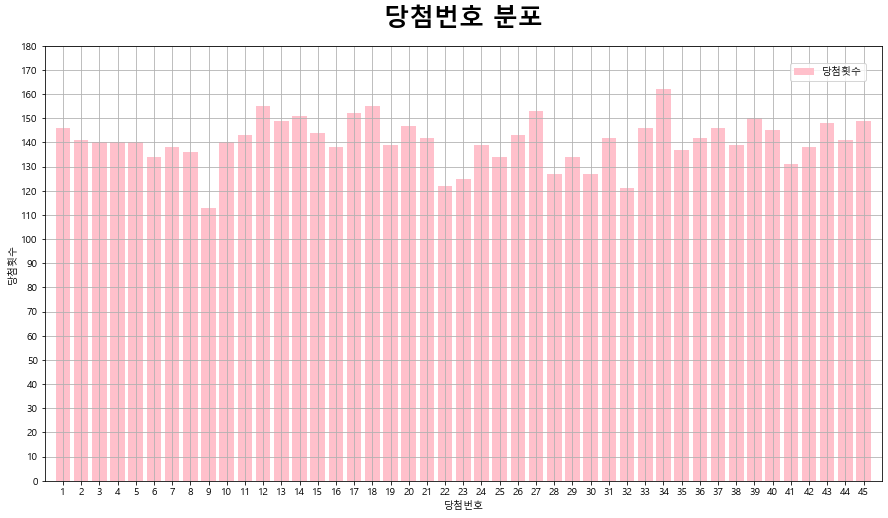

In [18]:
plt.figure(figsize=(15,8))
plt.bar(total_number.index, total_number['당첨횟수'], color='pink', label='당첨횟수')

plt.xlabel('당첨번호')
plt.ylabel('당첨횟수')
plt.xticks(np.arange(1,46))
plt.yticks(np.arange(0,190,10))
plt.xlim(0,46)
plt.grid(True)

plt.title('당첨번호 분포', fontsize=25, fontweight='bold', pad=20)
plt.legend(loc=(0.89,0.92))

plt.show()

In [19]:
total_number[total_number['당첨횟수']==max(total_number['당첨횟수'])]

,당첨횟수
34,162


In [20]:
total_number[total_number['당첨횟수']==min(total_number['당첨횟수'])]

,당첨횟수
9,113


In [21]:
162 - 113

49

In [22]:
total_number.sort_values(by='당첨횟수', ascending=False).head()

,당첨횟수
34,162
18,155
12,155
27,153
17,152


In [23]:
total_number.sort_values(by='당첨횟수').head()

,당첨횟수
9,113
32,121
22,122
23,125
30,127


- 번호가 대체로 고르게 분포되어있다.
- 가장 많이 당첨되었던 번호와 가장 적게 당첨되었던 번호의 차이가 49회 정도난다.
- 가장 많이 당첨되었던 번호 상위 5개(34, 18, 12, 27, 17)
- 가장 많이 당첨되었던 번호 하위 5개(9, 32, 22, 23, 30)

### 함수 생성

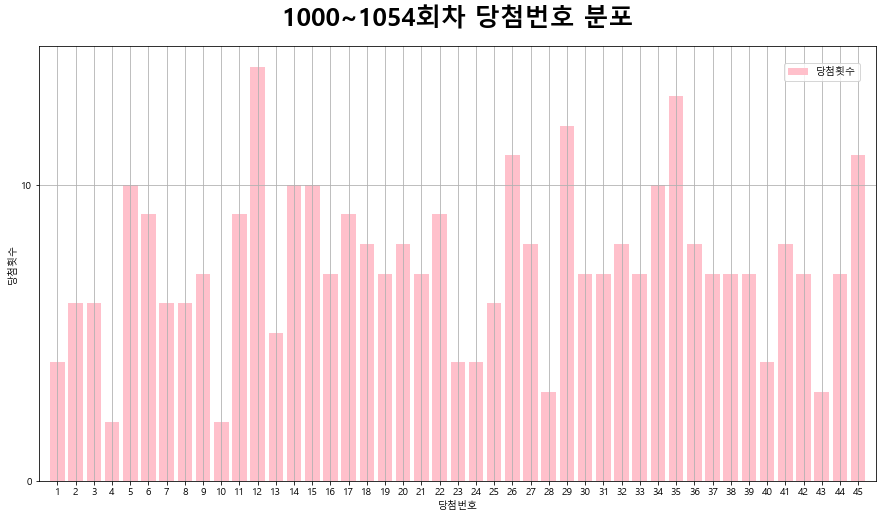

In [24]:
def lotto_stats1(n=1,m=1054, bonus=False, fig=190):   # n,m : 회차 번호, bonus : 보너스 포함/미포함, fig : 그래프 y축 범위
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib import font_manager, rc
    font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font)

    data = pd.read_csv('d:\\data\\lotto_num.csv')
    lotto = data[n-1:m]
    
    if bonus==True:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6'], lotto['보너스']]).value_counts().sort_index()
    else:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()
    
    total_number = pd.DataFrame(numbers)
    total_number.columns =['당첨횟수']
    
    plt.figure(figsize=(15,8))
    plt.bar(total_number.index, total_number['당첨횟수'], color='pink', label='당첨횟수')

    plt.xlabel('당첨번호')
    plt.ylabel('당첨횟수')
    plt.xticks(np.arange(1,46))
    plt.yticks(np.arange(0,fig,10))
    plt.xlim(0,46)
    plt.grid(True)

    plt.title(str(n)+'~'+str(m)+'회차 '+'당첨번호 분포', fontsize=25, fontweight='bold', pad=20)
    plt.legend(loc=(0.89,0.92))

    plt.show()
    
#     return total_number
        
lotto_stats1(1000,fig=20)

### 4-2. 색상 통계

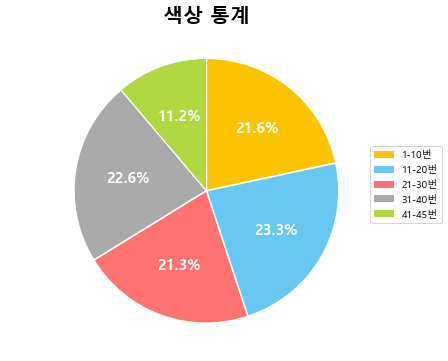

In [25]:
# a = total_number[:10].sum()[0]
# b = total_number[10:20].sum()[0]
# c = total_number[20:30].sum()[0]
# d = total_number[30:40].sum()[0]
# e = total_number[40:].sum()[0]

a = total_number[total_number.index <= 10].sum()[0]
b = total_number[(total_number.index > 10) & (total_number.index <= 20)].sum()[0]
c = total_number[(total_number.index > 20) & (total_number.index <= 30)].sum()[0]
d = total_number[(total_number.index > 30) & (total_number.index <= 40)].sum()[0]
e = total_number[total_number.index > 40].sum()[0]

n_10 = [a,b,c,d,e]

plt.figure(figsize=(8,6))

labels = ['1-10번', '11-20번', '21-30번', '31-40번', '41-45번']
explode = [0.01, 0.01, 0.01, 0.01, 0.01]
colors = ['#fbc400', '#69c8f2', '#ff7272', '#aaaaaa', '#b0d840']

textprops = dict(size=15, weight='bold', color="#ffffff")

plt.pie(n_10, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, textprops=textprops)

plt.title('색상 통계', fontsize=20, fontweight='bold', pad=0)

plt.legend(loc=(1,0.4))

plt.show()

- 번호대별 추첨 비율이 대체적으로 고르게 분포

### 함수 생성

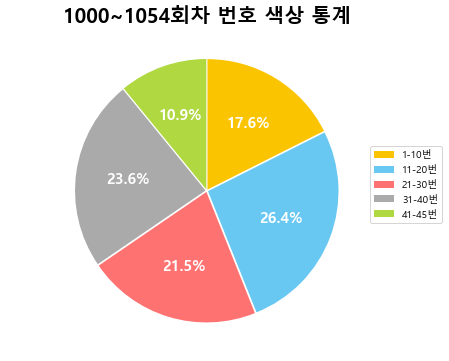

In [26]:
def lotto_stats2(n=1,m=1054, bonus=False):   # n,m : 회차 번호, bonus : 보너스 포함/미포함
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib import font_manager, rc
    font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font)

    data = pd.read_csv('d:\\data\\lotto_num.csv')
    lotto = data[n-1:m]
    
    if bonus==True:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6'], lotto['보너스']]).value_counts().sort_index()
    else:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()
    
    total_number = pd.DataFrame(numbers)
    total_number.columns =['당첨횟수']
    
    a = total_number[total_number.index <= 10].sum()[0]
    b = total_number[(total_number.index > 10) & (total_number.index <= 20)].sum()[0]
    c = total_number[(total_number.index > 20) & (total_number.index <= 30)].sum()[0]
    d = total_number[(total_number.index > 30) & (total_number.index <= 40)].sum()[0]
    e = total_number[total_number.index > 40].sum()[0]

    n_10 = [a,b,c,d,e]

    plt.figure(figsize=(8,6))

    labels = ['1-10번', '11-20번', '21-30번', '31-40번', '41-45번']
    explode = [0.01, 0.01, 0.01, 0.01, 0.01]
    colors = ['#fbc400', '#69c8f2', '#ff7272', '#aaaaaa', '#b0d840']

    textprops = dict(size=15, weight='bold', color="#ffffff")

    plt.pie(n_10, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, textprops=textprops)

    plt.title(str(n)+'~'+str(m)+'회차 '+'번호 색상 통계', fontsize=20, fontweight='bold', pad=0)

    plt.legend(loc=(1,0.4))

    plt.show()
    
    #return total_number
        
lotto_stats2(1000)

### 4-3. 구간별 출현횟수

In [27]:
data[1054-5:1054]

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
1049,1050회,2023-01-14,6,12,31,35,38,43,17,17,1535083280,108072602000
1050,1051회,2023-01-21,21,26,30,32,33,35,44,18,1669558480,119243907000
1051,1052회,2023-01-28,5,17,26,27,35,38,1,11,2341682762,107565461000
1052,1053회,2023-02-04,22,26,29,30,34,45,15,7,4090367411,113721665000
1053,1054회,2023-02-11,14,19,27,28,30,45,33,9,3147925709,113660567000


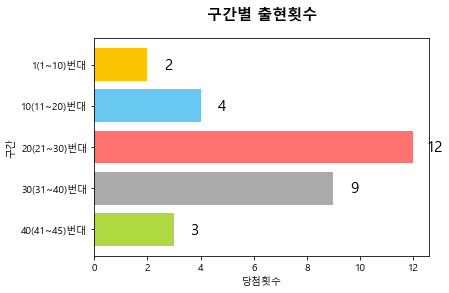

In [28]:
lotto = data[1054-5:1054]

numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()
total_number = pd.DataFrame(numbers)
total_number.columns =['당첨횟수']

a = total_number[total_number.index <= 10].sum()[0]
b = total_number[(total_number.index > 10) & (total_number.index <= 20)].sum()[0]
c = total_number[(total_number.index > 20) & (total_number.index <= 30)].sum()[0]
d = total_number[(total_number.index > 30) & (total_number.index <= 40)].sum()[0]
e = total_number[total_number.index > 40].sum()[0]

n_10 = list(reversed([a,b,c,d,e]))

nn = ['40(41~45)번대', '30(31~40)번대', '20(21~30)번대', '10(11~20)번대', '1(1~10)번대']
colors = ['#b0d840', '#aaaaaa', '#ff7272', '#69c8f2', '#fbc400']

#plt.figure(figsize=(6,4))
barh = plt.barh(nn, n_10, color=colors)

plt.xlabel('당첨횟수')
plt.ylabel('구간')

# 숫자 넣는 부분
for rect in barh:
    width = rect.get_width()
    plt.text(width + 0.8, rect.get_y() + 0.2, '%d'% width, ha='center', va='bottom', size = 15)

plt.title('구간별 출현횟수', fontsize=15, fontweight='bold', pad=20)

plt.show()

- 최근 5주간 구간별 당첨 번호의 출현비율을 보면, 20번대, 30번대 순으로 많은 것을 확인

### 함수 생성

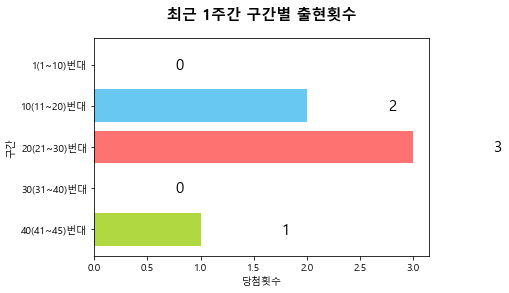

In [29]:
def lotto_stats3(n=5, bonus=False):   # n : 최근 n주간 추첨번호, bonus : 보너스 포함/미포함
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib import font_manager, rc
    font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font)
    
    data = pd.read_csv('d:\\data\\lotto_num.csv')
    lotto = data[1054-n:1054]

    if bonus==True:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6'], lotto['보너스']]).value_counts().sort_index()
    else:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()

    total_number = pd.DataFrame(numbers)
    total_number.columns =['당첨횟수']

    a = total_number[total_number.index <= 10].sum()[0]
    b = total_number[(total_number.index > 10) & (total_number.index <= 20)].sum()[0]
    c = total_number[(total_number.index > 20) & (total_number.index <= 30)].sum()[0]
    d = total_number[(total_number.index > 30) & (total_number.index <= 40)].sum()[0]
    e = total_number[total_number.index > 40].sum()[0]

    n_10 = list(reversed([a,b,c,d,e]))

    nn = ['40(41~45)번대', '30(31~40)번대', '20(21~30)번대', '10(11~20)번대', '1(1~10)번대']
    colors = ['#b0d840', '#aaaaaa', '#ff7272', '#69c8f2', '#fbc400']

    #plt.figure(figsize=(6,4))
    barh = plt.barh(nn, n_10, color=colors)

    plt.xlabel('당첨횟수')
    plt.ylabel('구간')

    # 숫자 넣는 부분
    for rect in barh:
        width = rect.get_width()
        plt.text(width + 0.8, rect.get_y() + 0.2, '%d'% width, ha='center', va='bottom', size = 15)

    plt.title('최근 '+str(n)+'주간 '+'구간별 출현횟수', fontsize=15, fontweight='bold', pad=20)

    plt.show()
    
#     return total_number
    
lotto_stats3(1)

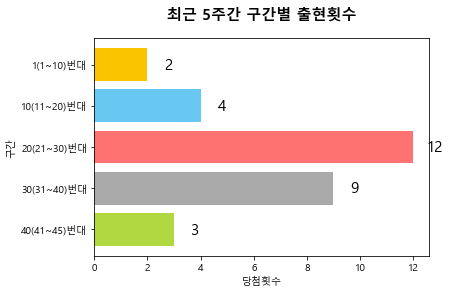

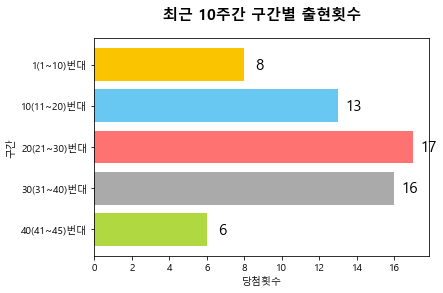

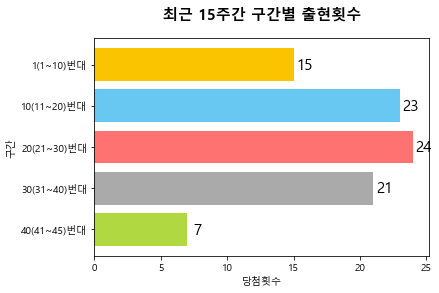

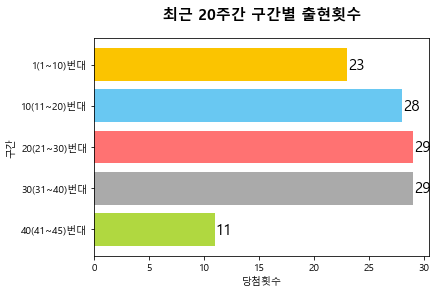

In [30]:
lotto_stats3(5)
lotto_stats3(10)
lotto_stats3(15)
lotto_stats3(20)

- 5, 10, 15, 20주간 구간별 출현횟수를 보면, 최근 5주 간은 20번대, 30번대가 많이 보이며  
기간이 길어질수록 10번대, 20번대, 30번대 출현 빈도가 비슷해지고, 1번대는 상대적으로 적은 빈도를 보인다.  
(40번대는 번호가 적으므로 예외)
- 기간이 길어질수록 전체적인 번호 분포가 비슷해지는 것으로 보아 최근 5주간 잘 나오지 않았던  
1, 10번대 숫자가 추첨될 것으로 예측해볼 수 있을거같다.

### 4-4. 기간별 미출현 번호

In [31]:
lotto = data[1054-5:1054]

numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()
total_number = pd.DataFrame(numbers)
total_number.columns =['당첨횟수']

a=[]
b=[]
c=[]
d=[]
e=[]
for i in range(1,46):
    if i not in list(total_number.index):
        if i > 40:
            e.append(i)
        elif i > 30:
            d.append(i)
        elif i > 20:
            c.append(i)
        elif i > 10:
            b.append(i)
        else:
            a.append(i)
            
# print(a)
# print(b)
# print(c)
# print(d)
# print(e)

import re
a = re.sub('[\[\]]', '', str(a))
b = re.sub('[\[\]]', '', str(b))
c = re.sub('[\[\]]', '', str(c))
d = re.sub('[\[\]]', '', str(d))
e = re.sub('[\[\]]', '', str(e))

nn = ['1~10번', '11~20번', '21~30번', '31~40번', '41~45번']

pd.DataFrame({"번호대" : nn, "미출현번호" : [a,b,c,d,e] }).style.hide(axis='index')

번호대,미출현번호
1~10번,"1, 2, 3, 4, 7, 8, 9, 10"
11~20번,"11, 13, 15, 16, 18, 20"
21~30번,"23, 24, 25"
31~40번,"36, 37, 39, 40"
41~45번,"41, 42, 44"


- 최근 5주간 1번대와, 10번대의 미출현 번호가 많은 것으로 보인다.

### 함수 생성

In [32]:
def lotto_stats4(n=5, bonus=False):   # n : 최근 n주간 추첨번호, bonus : 보너스 포함/미포함
    import pandas as pd
    import re
    
    data = pd.read_csv('d:\\data\\lotto_num.csv')
    lotto = data[1054-n:1054]

    if bonus==True:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6'], lotto['보너스']]).value_counts().sort_index()
    else:
        numbers = pd.concat([lotto['번호1'], lotto['번호2'], lotto['번호3'], lotto['번호4'], lotto['번호5'], lotto['번호6']]).value_counts().sort_index()

    total_number = pd.DataFrame(numbers)
    total_number.columns =['당첨횟수']
    
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    for i in range(1,46):
        if i not in list(total_number.index):
            if i > 40:
                e.append(i)
            elif i > 30:
                d.append(i)
            elif i > 20:
                c.append(i)
            elif i > 10:
                b.append(i)
            else:
                a.append(i)
                
    a = re.sub('[\[\]]', '', str(a))
    b = re.sub('[\[\]]', '', str(b))
    c = re.sub('[\[\]]', '', str(c))
    d = re.sub('[\[\]]', '', str(d))
    e = re.sub('[\[\]]', '', str(e))

    nn = ['1~10번', '11~20번', '21~30번', '31~40번', '41~45번']

    display(pd.DataFrame({"번호대" : nn, "미출현번호" : [a,b,c,d,e] }).style.hide(axis='index'))
    
lotto_stats4()

번호대,미출현번호
1~10번,"1, 2, 3, 4, 7, 8, 9, 10"
11~20번,"11, 13, 15, 16, 18, 20"
21~30번,"23, 24, 25"
31~40번,"36, 37, 39, 40"
41~45번,"41, 42, 44"


In [33]:
lotto_stats4(5)
lotto_stats4(10)
lotto_stats4(15)
lotto_stats4(20)

번호대,미출현번호
1~10번,"1, 2, 3, 4, 7, 8, 9, 10"
11~20번,"11, 13, 15, 16, 18, 20"
21~30번,"23, 24, 25"
31~40번,"36, 37, 39, 40"
41~45번,"41, 42, 44"


번호대,미출현번호
1~10번,"1, 4, 8, 9, 10"
11~20번,"11, 18"
21~30번,"23, 24"
31~40번,
41~45번,


번호대,미출현번호
1~10번,"1, 4, 10"
11~20번,
21~30번,24
31~40번,
41~45번,


번호대,미출현번호
1~10번,"1, 4, 10"
11~20번,
21~30번,
31~40번,
41~45번,


- 최근 20주간 1, 4, 10번 추첨번호가 나오지 않았다.

### 4-5. 홀짝 통계

In [34]:
import numpy as np

total_even=[]
for j in range(0,1054):
    even=0
    for i in range(2,8):
        number = data.iloc[j,i]
        if number%2 == 0:
            even+=1
    total_even.append(even)
    
total_even=np.array(total_even)
total_even

total_odd = 6-np.array(total_even)
total_odd

data_odd_even = pd.DataFrame({"회차":data['회차'], "당첨일자":data['일자'], "홀수":total_odd, "짝수":total_even})
data_odd_even

,회차,당첨일자,홀수,짝수
0,1회,2002-12-07,4,2
1,2회,2002-12-14,4,2
2,3회,2002-12-21,5,1
3,4회,2002-12-28,2,4
4,5회,2003-01-04,2,4
...,...,...,...,...
1049,1050회,2023-01-14,3,3
1050,1051회,2023-01-21,3,3
1051,1052회,2023-01-28,4,2
1052,1053회,2023-02-04,2,4


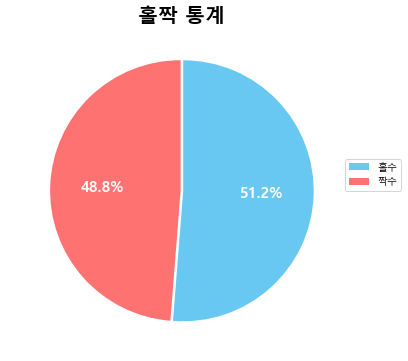

In [35]:
a=data_odd_even[0:]['홀수'].sum()
b=data_odd_even[0:]['짝수'].sum()

plt.figure(figsize=(8,6))

labels = ['홀수', '짝수']
explode = [0.01, 0.01]
colors = ['#69c8f2', '#ff7272']

textprops = dict(size=15, weight='bold', color="#ffffff")

plt.pie([a,b], labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, textprops=textprops)

plt.title('홀짝 통계', fontsize=20, fontweight='bold', pad=0)

plt.legend(loc=(1,0.5))

plt.show()

### 함수생성

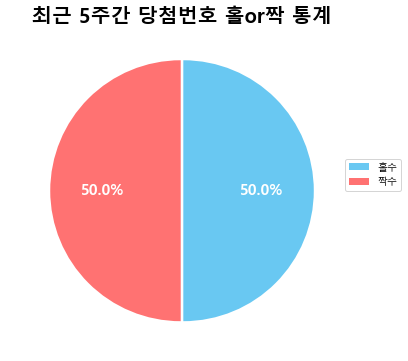

In [36]:
def lotto_stats5(n=5, bonus=False):   # n,m : 회차 번호, bonus : 보너스 포함/미포함
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib import font_manager, rc
    font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font)

    data = pd.read_csv('d:\\data\\lotto_num.csv')
    
    # 홀수, 짝수 개수 데이터 프레임 만들기
    total_even=[]
    for j in range(0,1054):
        even=0
        for i in range(2,8):
            number = data.iloc[j,i]
            if number%2 == 0:
                even+=1
        total_even.append(even)

    total_even=np.array(total_even)
    total_odd = 6-np.array(total_even)
    
    data_odd_even = pd.DataFrame({"회차":data['회차'], "당첨일자":data['일자'], "홀수":total_odd, "짝수":total_even})
    
    a=data_odd_even[1054-n:1054]['홀수'].sum()
    b=data_odd_even[1054-n:1054]['짝수'].sum()
    
    # 홀수, 짝수 비율 그래프 그리기
    plt.figure(figsize=(8,6))

    labels = ['홀수', '짝수']
    explode = [0.01, 0.01]
    colors = ['#69c8f2', '#ff7272']

    textprops = dict(size=15, weight='bold', color="#ffffff")

    plt.pie([a,b], labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, textprops=textprops)

    plt.title('최근 '+str(n)+'주간 '+'당첨번호 홀or짝 통계', fontsize=20, fontweight='bold', pad=0)

    plt.legend(loc=(1,0.5))

    plt.show()
    
#     return data_odd_even
        
lotto_stats5()

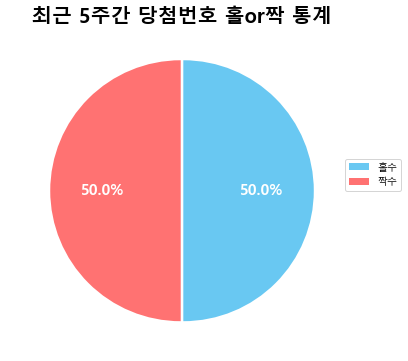

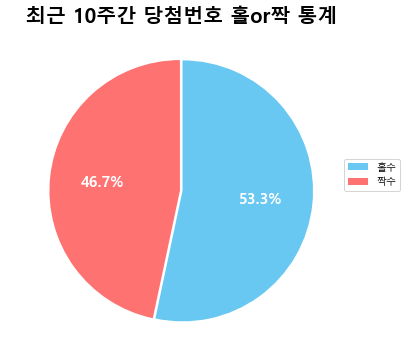

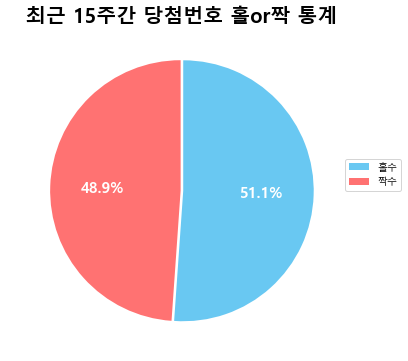

In [37]:
lotto_stats5(5)
lotto_stats5(10)
lotto_stats5(15)

- 최근 5주간 당첨 번호의 홀수, 짝수 비율이 같았다.
- 최근 10주, 15주간 홀수 비율이 조금 더 많았다.

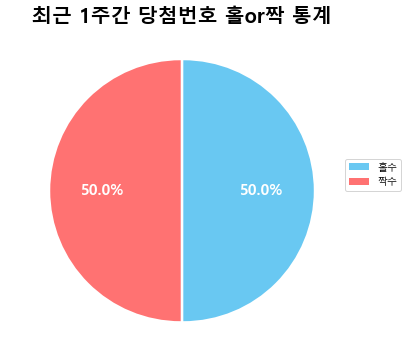

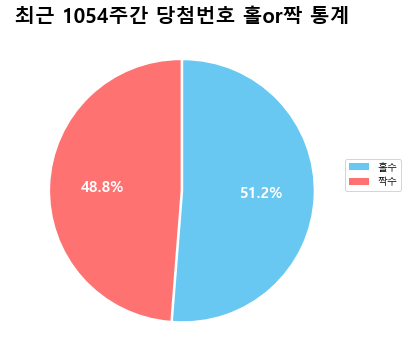

In [38]:
lotto_stats5(1)
lotto_stats5(1054)

- 가장 최근 회차의 홀수, 짝수 비율이 동일
- 전체적인 홀수, 짝수 비율은 홀수가 약간 높다. (번호의 홀수의 갯수가 짝수의 갯수보다 1개 더 많음)

### 4-6. 연속번호 출현

In [39]:
import numpy as np

total_pair=[]
for i in range(0,1054):
    pair=0
    for j in range(7,2,-1):
        if data.iloc[i,j] - data.iloc[i,j-1] == 1:
            pair += 1
    total_pair.append(pair)
        
total_pair = np.array(total_pair)
total_num = data['번호1'].astype('str') + ', ' + data['번호2'].astype('str') + ', ' + data['번호3'].astype('str')\
 + ', ' + data['번호4'].astype('str') + ', ' + data['번호5'].astype('str') + ', ' + data['번호6'].astype('str')

data_s = pd.DataFrame({"회차":data['회차'], "당첨일자":data['일자'], "당첨번호":total_num, "연속번호 출현횟수":total_pair})
data_s

,회차,당첨일자,당첨번호,연속번호 출현횟수
0,1회,2002-12-07,"10, 23, 29, 33, 37, 40",0
1,2회,2002-12-14,"9, 13, 21, 25, 32, 42",0
2,3회,2002-12-21,"11, 16, 19, 21, 27, 31",0
3,4회,2002-12-28,"14, 27, 30, 31, 40, 42",1
4,5회,2003-01-04,"16, 24, 29, 40, 41, 42",2
...,...,...,...,...
1049,1050회,2023-01-14,"6, 12, 31, 35, 38, 43",0
1050,1051회,2023-01-21,"21, 26, 30, 32, 33, 35",1
1051,1052회,2023-01-28,"5, 17, 26, 27, 35, 38",1
1052,1053회,2023-02-04,"22, 26, 29, 30, 34, 45",1


In [40]:
data_s[data_s['연속번호 출현횟수']==data_s['연속번호 출현횟수'].max()]

,회차,당첨일자,당첨번호,연속번호 출현횟수
291,292회,2008-07-05,"17, 18, 31, 32, 33, 34",4


In [41]:
data_s['연속번호 출현횟수'].value_counts()

0    511
1    409
2    118
3     15
4      1
Name: 연속번호 출현횟수, dtype: int64

In [42]:
data_s['연속번호 출현횟수'].value_counts(normalize=True)

0    0.484820
1    0.388046
2    0.111954
3    0.014231
4    0.000949
Name: 연속번호 출현횟수, dtype: float64

- 가장 많은 연속번호가 당첨된 경우는 4쌍
- 연속 번호가 없는 경우와 연속 번호가 1쌍 이상인 비율이 대략 0.5:0.5

### 4-7. 당첨자수 및 당첨금액, 판매금액 통계

In [43]:
# 연도 컬럼 생성
data['year'] = data['일자'].dt.year

In [44]:
pd.set_option('display.float_format', '{:,}'.format)   # 천단위 표시
# pd.set_option('display.float_format', None)  # 원상복구

In [45]:
round(data[['1등 당첨자수', '1등 당첨금액', '총 판매금액']][data['1등 당첨자수']!=0].agg(['mean', 'max', 'min']))

,1등 당첨자수,1등 당첨금액,총 판매금액
mean,8.0,"2,747,479,199.0","65,031,048,462.0"
max,50.0,"40,722,959,400.0","260,856,392,000.0"
min,1.0,"405,939,950.0","4,729,342,000.0"


- 당첨자수 **평균** 8명, 당첨금액 27억원, 판매금액 647억원
- 당첨자수 **최고** 50명, 당첨금액 407억원, 판매금액 2608억원
- **최저** 당첨금액 4억원

### 당첨자수 분포

In [46]:
pd.cut(data['1등 당첨자수'], bins=5).value_counts(normalize=True)

(-0.05, 10.0]      0.8083491461100569
(10.0, 20.0]       0.1840607210626186
(20.0, 30.0]     0.006641366223908918
(40.0, 50.0]    0.0009487666034155598
(30.0, 40.0]                      0.0
Name: 1등 당첨자수, dtype: float64

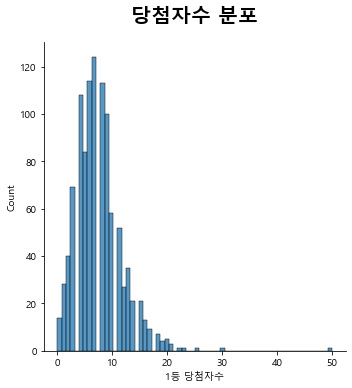

In [47]:
sns.displot(data, x='1등 당첨자수')
plt.title('당첨자수 분포', fontsize=20, fontweight='bold', pad=20)
plt.show()

In [48]:
bins = [-0.05, 10, 20, 30, 40, 50]
pd.cut(data[data['year']>2017]['1등 당첨자수'], bins).value_counts(normalize=True)

(-0.05, 10.0]     0.5767790262172284
(10.0, 20.0]     0.40823970037453183
(20.0, 30.0]    0.011235955056179775
(40.0, 50.0]    0.003745318352059925
(30.0, 40.0]                     0.0
Name: 1등 당첨자수, dtype: float64

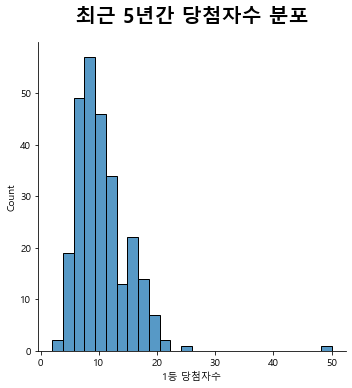

In [49]:
sns.displot(data[data['year']>2017], x='1등 당첨자수')
plt.title('최근 5년간 당첨자수 분포', fontsize=20, fontweight='bold', pad=20)
plt.show()

- 당첨자가 10명 이하인 경우 전체의 80%
- 최근 5년간 당첨자 수가 많이 늘었다. (10명 이하 당첨자 57%)

### 최고 당첨금액

In [50]:
data.sort_values(by='1등 당첨금액', ascending=False).head(20)

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액,year
18,19회,2003-04-12,6,30,38,39,40,43,26,1,40722959400,105957818000,2003
24,25회,2003-05-24,2,4,21,26,43,44,16,2,24227745300,120073768000,2003
19,20회,2003-04-19,10,14,18,20,23,30,41,1,19352212800,81056776000,2003
42,43회,2003-09-27,6,31,35,38,39,44,1,1,17749630800,74686296000,2003
14,15회,2003-03-15,3,4,16,30,31,37,13,1,17014245000,73264910000,2003
35,36회,2003-08-09,1,10,23,26,28,40,31,1,16014475800,66856686000,2003
61,62회,2004-02-07,3,8,15,27,29,35,21,1,15817286400,66740368000,2004
32,33회,2003-07-19,4,7,32,33,40,41,9,1,14903517600,67457252000,2003
81,82회,2004-06-26,1,2,3,14,27,42,39,1,14562494400,61302808000,2004
85,86회,2004-07-24,2,12,37,39,41,45,33,1,14252186400,59835968000,2004


- 최고 당첨 금액은 407억원, 19회차 당첨 (이전 회차 당첨금액 이월)  
[**로또 407억 주인공…“평범한 경찰이 '회장님'으로**](https://n.news.naver.com/mnews/article/087/0000415473?sid=102)
- 대체적으로 당첨금이 큰 경우가 과거에 분포 (최근 1018회차 예외)

### 로또 판매량 추이

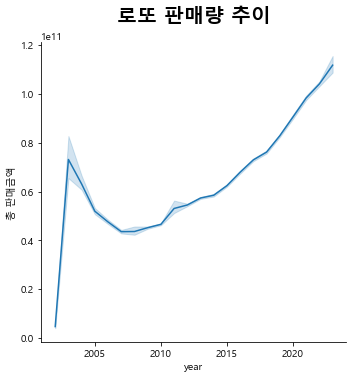

In [51]:
sns.relplot(x='year', y='총 판매금액', kind='line', data=data)
plt.title('로또 판매량 추이', fontsize=20, fontweight='bold', pad=20)
plt.show()

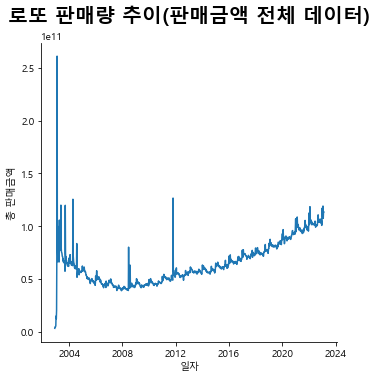

In [52]:
sns.relplot(x='일자', y='총 판매금액', kind='line', data=data)
plt.title('로또 판매량 추이(판매금액 전체 데이터)', fontsize=20, fontweight='bold', pad=20)
plt.show()

In [53]:
data[161:731].sort_values(by='총 판매금액', ascending=False).head(5)

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액,year
463,464회,2011-10-22,6,12,15,34,42,44,4,13,3355721106,126772274000,2011
289,290회,2008-06-21,8,13,18,32,39,45,7,13,2149214424,80362302000,2008
687,688회,2016-02-06,5,15,22,23,34,35,2,9,1967536750,73095612000,2016
682,683회,2016-01-02,6,13,20,27,28,40,15,16,1010930883,71940091000,2016
720,721회,2016-09-24,1,28,35,41,43,44,31,8,2273767360,71627567000,2016


In [54]:
data[data['1등 당첨자수']==0]

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액,year
0,1회,2002-12-07,10,23,29,33,37,40,16,0,0,3681782000,2002
3,4회,2002-12-28,14,27,30,31,40,42,2,0,0,5271464000,2002
4,5회,2003-01-04,16,24,29,40,41,42,3,0,0,6277102000,2003
6,7회,2003-01-18,2,9,16,25,26,40,42,0,0,12794890000,2003
7,8회,2003-01-25,8,19,25,34,37,39,9,0,0,20751450000,2003
8,9회,2003-02-01,2,4,16,17,36,39,14,0,0,73624020000,2003
12,13회,2003-03-01,22,23,25,37,38,42,26,0,0,66532136000,2003
17,18회,2003-04-05,3,12,13,19,32,35,29,0,0,66371660000,2003
23,24회,2003-05-17,7,8,27,29,36,43,6,0,0,78486634000,2003
40,41회,2003-09-13,13,20,23,35,38,43,34,0,0,57624562000,2003


- 로또 판매 개시 후 급상승하였다가 점차 감소 후 2008년 이후 꾸준히 상승
- 2003년 2월 로또 관련 주요 뉴스 [**"온나라가 ＂로또…로또…＂ 狂風 실태와 문제점"**](https://www.donga.com/news/Economy/article/all/20030205/7909508/1)
- 2011년, 2008년 판매량 급상승 시점 존재 (이전 회차 당첨금액 이월)
[**링크**](https://www.hani.co.kr/arti/economy/economy_general/500918.html)
- 로또 당첨자가 안나온 경우, 다음 회차 판매금액 상승

### 당첨자 수와 판매량

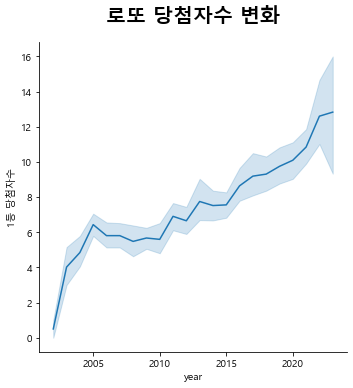

In [55]:
sns.relplot(x='year', y='1등 당첨자수', kind='line', data=data)
plt.title('로또 당첨자수 변화', fontsize=20, fontweight='bold', pad=20)
plt.show()

In [56]:
# 큰 이상치 제거
data_copy = data.drop(data.index[[1018, 545, 9]], inplace=False)

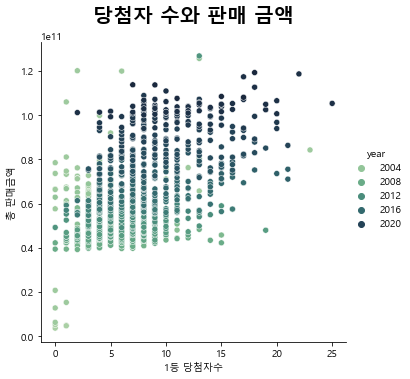

In [57]:
sns.relplot(x='1등 당첨자수', y='총 판매금액', hue='year', palette="ch:r=-.5,l=.75", data=data_copy)
plt.title('당첨자 수와 판매 금액', fontsize=20, fontweight='bold', pad=20)
plt.show()

- 당첨자 수도 판매량과 비슷하게 증가추세를 보인다.
- 당첨자 수와 판매 금액이 양의 상관관계를 보이며 해마다 함께 증가하는 양상

## 5. 예측

- 가설 1 : 가장 적게 나왔던 하위 5개의 당첨 번호 **9, 32, 22, 23, 30**의 번호가 나올 것이다.
- 가설2 : 최근 5주간 잘 나오지 않았던 **1~20번** 사이의 번호가 나올 것이다.
- 가설3 : 최근 20주간 미출현 번호인 **1, 4, 10** 번이 나올 것이다.

In [58]:
new_data = pd.read_csv('d:\\data\\lotto_num_최신.csv')
new_data

,회차,일자,번호1,번호2,번호3,번호4,번호5,번호6,보너스,1등 당첨자수,1등 당첨금액,총 판매금액
0,1055회,2023년02월18일,4,7,12,14,22,33,31,11,"2,362,815,205원","112,488,256,000원"
1,1056회,2023년02월25일,13,20,24,32,36,45,29,14,"1,969,662,456원","113,279,615,000원"
2,1057회,2023년03월04일,8,13,19,27,40,45,12,17,"1,616,069,714원","112,523,887,000원"


**1055회차**에서 4번, 22번이 추첨 되었고 1~20번 사이의 번호가 6개 중 4개 나왔다.  
이후 회차에서는 예측이 실패하였다.

## 6. 결론 및 시사점

로또는 2002년 12월 첫 판매 이후 **꾸준히 판매량이 증가**하였으며,  
그와 동시에 **당첨자 수도 해마다 증가**하는 추세를 보이고 있다.  
로또와 같은 추첨 복권은 매 시행이 **독립시행**(매 시행마다 특정 결과가 나올 확률이 변하지 않는 것)으로  
1등 당첨 확률이 **814만분의 1**로 동일하다.  
확률로 보았을 때, 매주 1억개의 로또가 팔리고(약 1000억원어치) 1등 당첨 확률이 814만분의 1로 대략 **12명**의 1등 당첨자가 나올 수 있다.  
그러나 판매 금액과 당첨 금액에 따라 대략적인 **기대값**을 구하면 로또 1개당 약 -500원정도가 나온다.  
물론 당첨에 대한 **기대와 행복한 상상**을 통해 보내는 일주일은 바쁜 일상으로 지친 사람들에게 위로가 되어주는 것 같다.  
로또 판매를 시작한 초창기부터 지금까지 로또에 대한 **이슈나 실태** 등 문제도 있겠지만,  
판매량은 꾸준히 증가하였고 앞으로도 **지속**될 것으로 보인다.  

1회차부터 최근까지 로또 당첨 번호는 통계적으로 **고르게 분포**하며 번호대별 분포도 유사하고 홀수와 짝수 번호 비율도 유사하다.  
이번 주제인 로또 데이터 분석과 예측을 진행하면서 효용성 있는 모델을 구현하지는 못하였다.  
그러나 데이터를 직접 **수집**하고 번호들의 **분포, 출현 빈도** 등을 파이썬 **함수 코드로 구현 및 시각화** 함으로서  
손 쉽게 분석 작업을 할 수 있으며 약간의 분포 및 빈도간의 차이를 고려하여 번호를 예측해볼 수 있을 것 같다.(단, 독립시행인 것을 유념)  
마지막으로 **추후 보완사항**은 파이썬 코드로 작성한 함수들을 **사용자 인터페이스 구현**을 통해 좀 더 간소화된 프로그램으로 제작,  
**딥러닝 모델**(LSTM 등)을 활용한 로또 예측 모델 구현(실제 학습은 불가능)을 해볼 수 있을 것 같다.